In [3]:
from sklearn.ensemble import RandomForestRegressor

from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np
import pandas as pd

from datetime import datetime

# Preprocessing

In [4]:
import pandas as pd
import numpy as np

input = './data/final_df.csv'
df = pd.read_csv(input, nrows=3720)
# df = pd.read_csv(input)

df['season'] = df['season'].astype('category')

df['round'] = df['round'].astype('category')

df['date'] = pd.to_datetime(df['date'])

df['start_time'] = df['start_time'].astype('category')

df['driver_name'] = df['driver_name'].astype('category')

df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
# df['age2'] = (df['date'] - df['date_of_birth']).astype('<m8[Y]') # Original, ValueError
df['age2'] = (df['date'] - df['date_of_birth'])
df['age2'] = df['age2'] / np.timedelta64(1, 'Y')
df['age2'] = np.floor(df['age2'])
# df['age2'] = df['age2'].astype('<m8[Y]') # Somehow, converts year back to days
# display(df['age2'])

df['date_of_birth'] = df['age2']
df.rename(columns={'date_of_birth': 'age'}, inplace=True)
df = df.drop('age2', axis=1)

df['driver_nationality'] = df['driver_nationality'].astype('category')

category_order0 = [0.0, 24.0, 23.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 
                  12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
df['driver_standings_pos'] = pd.Categorical(df['driver_standings_pos'], categories=category_order0, ordered=True)

df['initial_tyre'] = df['initial_tyre'].fillna(df.groupby('circuit_id')['initial_tyre'].transform(lambda x: x.mode().iloc[0]))
df['initial_tyre'] = df['initial_tyre'].astype('category')

max_values0 = df.groupby(['season', 'round'])['qualifying_position'].transform('max')
df['qualifying_position'] = df['qualifying_position'].fillna(max_values0 + 1)
category_order1 = [22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 
                   11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]

max_time_values0 = df.groupby(['season', 'round'])['qualifying_time'].transform('max')
df['qualifying_time'] = df['qualifying_time'].fillna(max_time_values0)

df['circuit_id'] = df['circuit_id'].astype('category')

df['circuit_name'] = df['circuit_name'].astype('category')

df['circuit_city'] = df['circuit_city'].astype('category')

df['circuit_country'] = df['circuit_country'].astype('category')

df['constructor_name'] = df['constructor_name'].astype('category')

df['constructor_country'] = df['constructor_country'].astype('category')

category_order2 = [0.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
df['constructor_standings_pos'] = pd.Categorical(df['constructor_standings_pos'], categories=category_order2, ordered=True)

mask1 = (df['season'] == 2020) & (df['round'] == 11)
df.loc[mask1, ['fp_pos_1', 'fp_time_1']] = df.loc[mask1, ['fp_pos_3', 'fp_time_3']].values
max_values1 = df.groupby(['season', 'round'])['fp_pos_1'].transform('max')
max_time_values1 = df.groupby(['season', 'round'])['fp_time_1'].transform('max')
df['fp_pos_1'] = df['fp_pos_1'].fillna(max_values1 + 1)
df['fp_time_1'] = df['fp_time_1'].fillna(max_time_values1)

mask2 = (df['season'] == 2015) & (df['round'] == 16)
avg_fp_time = round(df.loc[mask2, ['fp_time_1', 'fp_time_3']].mean(axis=1))
df.loc[mask2, 'fp_time_2'] = avg_fp_time
df.loc[mask2, 'fp_pos_2'] = df.loc[mask2, 'fp_time_2'].rank(method='min')
mask3 = (df['season'] == 2017) & (df['round'] == 2)
avg_fp_time2 = round(df.loc[mask3, ['fp_time_1', 'fp_time_3']].mean(axis=1))
df.loc[mask3, 'fp_time_2'] = avg_fp_time2
df.loc[mask3, 'fp_pos_2'] = df.loc[mask3, 'fp_time_2'].rank(method='min')
mask4 = (df['season'] == 2020) & (df['round'] == 11)
df.loc[mask4, ['fp_pos_2', 'fp_time_2']] = df.loc[mask4, ['fp_pos_3', 'fp_time_3']].values
mask5 = (df['season'] == 2020) & (df['round'] == 13)
df.loc[mask5, ['fp_pos_2', 'fp_time_2']] = df.loc[mask5, ['fp_pos_1', 'fp_time_1']].values
mask6 = (df['season'] == 2023) & (df['round'] == 4)
df.loc[mask6, ['fp_pos_2', 'fp_time_2']] = df.loc[mask6, ['fp_pos_1', 'fp_time_1']].values
mask7 = (df['season'] == 2023) & (df['round'] == 9)
df.loc[mask7, ['fp_pos_2', 'fp_time_2']] = df.loc[mask7, ['fp_pos_1', 'fp_time_1']].values
mask8 = (df['season'] == 2023) & (df['round'] == 12)
df.loc[mask8, ['fp_pos_2', 'fp_time_2']] = df.loc[mask8, ['fp_pos_1', 'fp_time_1']].values
mask9 = (df['season'] == 2023) & (df['round'] == 17)
df.loc[mask9, ['fp_pos_2', 'fp_time_2']] = df.loc[mask9, ['fp_pos_1', 'fp_time_1']].values
mask10 = (df['season'] == 2023) & (df['round'] == 18)
df.loc[mask10, ['fp_pos_2', 'fp_time_2']] = df.loc[mask10, ['fp_pos_1', 'fp_time_1']].values
mask11 = (df['season'] == 2023) & (df['round'] == 20)
df.loc[mask11, ['fp_pos_2', 'fp_time_2']] = df.loc[mask11, ['fp_pos_1', 'fp_time_1']].values
max_values2 = df.groupby(['season', 'round'])['fp_pos_2'].transform('max')
max_time_values2 = df.groupby(['season', 'round'])['fp_time_2'].transform('max')
df['fp_pos_2'] = df['fp_pos_2'].fillna(max_values2 + 1)
df['fp_time_2'] = df['fp_time_2'].fillna(max_time_values2)

mask12 = (df['season'] == 2019) & (df['round'] == 17)
avg_fp_time3 = round(df.loc[mask12, ['fp_time_1', 'fp_time_2']].mean(axis=1))
df.loc[mask12, 'fp_time_3'] = avg_fp_time3
df.loc[mask12, 'fp_pos_3'] = df.loc[mask12, 'fp_time_3'].rank(method='min')
mask13 = (df['season'] == 2020) & (df['round'] == 2)
avg_fp_time4 = round(df.loc[mask13, ['fp_time_1', 'fp_time_2']].mean(axis=1))
df.loc[mask13, 'fp_time_3'] = avg_fp_time4
df.loc[mask13, 'fp_pos_3'] = df.loc[mask13, 'fp_time_3'].rank(method='min')
mask14 = (df['season'] == 2020) & (df['round'] == 13)
df.loc[mask14, ['fp_pos_3', 'fp_time_3']] = df.loc[mask14, ['fp_pos_1', 'fp_time_1']].values
mask15 = (df['season'] == 2021) & (df['round'] == 10)
avg_fp_time5 = round(df.loc[mask15, ['fp_time_1', 'fp_time_2']].mean(axis=1))
df.loc[mask15, 'fp_time_3'] = avg_fp_time5
df.loc[mask15, 'fp_pos_3'] = df.loc[mask15, 'fp_time_3'].rank(method='min')
mask16 = (df['season'] == 2021) & (df['round'] == 14)
avg_fp_time6 = round(df.loc[mask16, ['fp_time_1', 'fp_time_2']].mean(axis=1))
df.loc[mask16, 'fp_time_3'] = avg_fp_time6
df.loc[mask16, 'fp_pos_3'] = df.loc[mask16, 'fp_time_3'].rank(method='min')
mask17 = (df['season'] == 2021) & (df['round'] == 15)
avg_fp_time7 = round(df.loc[mask17, ['fp_time_1', 'fp_time_2']].mean(axis=1))
df.loc[mask17, 'fp_time_3'] = avg_fp_time7
df.loc[mask17, 'fp_pos_3'] = df.loc[mask17, 'fp_time_3'].rank(method='min')
mask18 = (df['season'] == 2021) & (df['round'] == 19)
avg_fp_time8 = round(df.loc[mask18, ['fp_time_1', 'fp_time_2']].mean(axis=1))
df.loc[mask18, 'fp_time_3'] = avg_fp_time8
df.loc[mask18, 'fp_pos_3'] = df.loc[mask18, 'fp_time_3'].rank(method='min')
mask19 = (df['season'] == 2022) & (df['round'] == 4)
avg_fp_time9 = round(df.loc[mask19, ['fp_time_1', 'fp_time_2']].mean(axis=1))
df.loc[mask19, 'fp_time_3'] = avg_fp_time9
df.loc[mask19, 'fp_pos_3'] = df.loc[mask19, 'fp_time_3'].rank(method='min')
mask20 = (df['season'] == 2022) & (df['round'] == 11)
avg_fp_time10 = round(df.loc[mask20, ['fp_time_1', 'fp_time_2']].mean(axis=1))
df.loc[mask20, 'fp_time_3'] = avg_fp_time10
df.loc[mask20, 'fp_pos_3'] = df.loc[mask20, 'fp_time_3'].rank(method='min')
mask21 = (df['season'] == 2022) & (df['round'] == 21)
avg_fp_time11 = round(df.loc[mask21, ['fp_time_1', 'fp_time_2']].mean(axis=1))
df.loc[mask21, 'fp_time_3'] = avg_fp_time11
df.loc[mask21, 'fp_pos_3'] = df.loc[mask21, 'fp_time_3'].rank(method='min')
mask22 = (df['season'] == 2023) & (df['round'] == 4)
df.loc[mask22, ['fp_pos_3', 'fp_time_3']] = df.loc[mask22, ['fp_pos_1', 'fp_time_1']].values
mask23 = (df['season'] == 2023) & (df['round'] == 9)
df.loc[mask23, ['fp_pos_3', 'fp_time_3']] = df.loc[mask23, ['fp_pos_1', 'fp_time_1']].values
mask24 = (df['season'] == 2023) & (df['round'] == 12)
df.loc[mask24, ['fp_pos_3', 'fp_time_3']] = df.loc[mask24, ['fp_pos_1', 'fp_time_1']].values
mask25 = (df['season'] == 2023) & (df['round'] == 17)
df.loc[mask25, ['fp_pos_3', 'fp_time_3']] = df.loc[mask25, ['fp_pos_1', 'fp_time_1']].values
mask26 = (df['season'] == 2023) & (df['round'] == 18)
df.loc[mask26, ['fp_pos_3', 'fp_time_3']] = df.loc[mask26, ['fp_pos_1', 'fp_time_1']].values
mask27 = (df['season'] == 2023) & (df['round'] == 20)
df.loc[mask27, ['fp_pos_3', 'fp_time_3']] = df.loc[mask27, ['fp_pos_1', 'fp_time_1']].values
max_values3 = df.groupby(['season', 'round'])['fp_pos_3'].transform('max')
max_time_values3 = df.groupby(['season', 'round'])['fp_time_3'].transform('max')
df['fp_pos_3'] = df['fp_pos_3'].fillna(max_values3 + 1)
df['fp_time_3'] = df['fp_time_3'].fillna(max_time_values3)

category_order3 = [23.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 
                  12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
df['fp_pos_1'] = pd.Categorical(df['fp_pos_1'], categories=category_order3, ordered=True)
category_order4 = [22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 
                  12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
df['fp_pos_2'] = pd.Categorical(df['fp_pos_2'], categories=category_order4, ordered=True)
category_order5 = [22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 
                  12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
df['fp_pos_3'] = pd.Categorical(df['fp_pos_3'], categories=category_order5, ordered=True)

df['weather_cloudy'] = df['weather_cloudy'].astype('category')

df['weather_cold'] = df['weather_cold'].astype('category')

df['weather_dry'] = df['weather_dry'].astype('category')

df['weather_warm'] = df['weather_warm'].astype('category')

df['weather_wet'] = df['weather_wet'].astype('category')

mask28 = ~df['has_sprint']

df['has_sprint'] = df['has_sprint'].astype('category')

df.loc[mask28, 'sprint_qualifying_position'] = df.loc[mask28, 'qualifying_position'].values
max_values4 = df.groupby(['season', 'round'])['sprint_qualifying_position'].transform('max')
df['sprint_qualifying_position'] = df['sprint_qualifying_position'].fillna(max_values4 + 1)
category_order6 = [22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 
                   11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
df['sprint_qualifying_position'] = pd.Categorical(df['sprint_qualifying_position'], categories=category_order6, ordered=True)

df['qualifying_position'] = pd.Categorical(df['qualifying_position'], categories=category_order1, ordered=True)

df.loc[mask28, 'sprint_qualifying_time'] = df.loc[mask28, 'qualifying_time'].values
max_time_values4 = df.groupby(['season', 'round'])['sprint_qualifying_time'].transform('max')
df['sprint_qualifying_time'] = df['sprint_qualifying_time'].fillna(max_time_values4)

df = df.drop('sprint_laps', axis=1)

category_order7 = [22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 
                   11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]

df['num_o_ps'] = df['num_o_ps'].fillna(0)

max_values5 = df.groupby(['season', 'round'])['time'].transform('max')
max_values6 = df.groupby(['season', 'round'])['fl_time'].transform('max')
df['time'] = df['time'].fillna(max_values5 + max_values6)

df['status'] = df['status'].astype('category')

mask29 = (df['season'] == 2021) & (df['round'] == 12)
df.loc[mask29, ['fl_pos', 'fl_time']] = df.loc[mask29, ['podium', 'time']].values

max_values7 = df.groupby(['season', 'round'])['fl_pos'].transform('max')
df['fl_pos'] = df['fl_pos'].fillna(max_values7 + 1)

df.loc[mask28, 'sprint_fl_pos'] = df.loc[mask28, 'fl_pos'].values

max_values8 = df.groupby(['season', 'round'])['sprint_fl_pos'].transform('max')
df['sprint_fl_pos'] = df['sprint_fl_pos'].fillna(max_values8 + 1)
mask30 = (df['season'] == 2023) & (df['round'] == 12)
df.loc[mask30, 'sprint_fl_time'] = np.maximum(df.loc[mask30, 'sprint_qualifying_time'], df.loc[mask30, 'qualifying_time'])
df.loc[mask30, 'sprint_fl_pos'] = df.loc[mask30, 'sprint_fl_time'].rank(method='min')

category_order8 = [22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 
                   11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
df['sprint_fl_pos'] = pd.Categorical(df['sprint_fl_pos'], categories=category_order8, ordered=True)
df['fl_pos'] = pd.Categorical(df['fl_pos'], categories=category_order8, ordered=True)

df['fl_time'] = df['fl_time'].fillna(max_values6)

max_values9 = df.groupby(['season', 'round'])['sprint_fl_time'].transform('max')
df['sprint_fl_time'] = df['sprint_fl_time'].fillna(max_values9)
df.loc[mask28, 'sprint_fl_time'] = df.loc[mask28, 'fl_time'].values

df['sprint_position'] = df['sprint_position'].replace(['dns', 'dnf'], np.nan)
df['sprint_position'] = df['sprint_position'].astype(float)
df.loc[mask28, 'sprint_position'] = df.loc[mask28, 'podium'].values
max_values10 = df.groupby(['season', 'round'])['sprint_position'].transform('max')
df['sprint_position'] = df['sprint_position'].fillna(max_values10+1)
df['podium'] = pd.Categorical(df['podium'], categories=category_order7, ordered=True)
df['sprint_position'] = pd.Categorical(df['sprint_position'], categories=category_order7, ordered=True)

df.loc[mask28, 'sprint_time'] = df.loc[mask28, 'time'].values
max_values11 = df.groupby(['season', 'round'])['sprint_time'].transform('max')
max_values12 = df.groupby(['season', 'round'])['sprint_fl_time'].transform('max')
df['sprint_time'] = df['sprint_time'].fillna(max_values11 + max_values12)

condition1 = (df['season'] == 2021) & (df['round'] == 12) & (df['driver_name'] == 'max verstappen')
df.loc[condition1, 'points'] = 13.0
condition2 = (df['season'] == 2021) & (df['round'] == 12) & (df['driver_name'] == 'lewis hamilton')
df.loc[condition2, 'points'] = 8.0
condition3 = (df['season'] == 2021) & (df['round'] == 12) & (df['driver_name'] == 'carlos sainz')
df.loc[condition3, 'points'] = 1.0

df.drop(['num_o_ps','time','status','fl_pos','fl_time','points'], inplace=True, axis=1)

from datetime import datetime

def days_since_epoch(input_date):
    """
    Converts the given date to the number of days since January 1, 1970 (Unix epoch).

    :param input_date: A string representing a date in the format 'YYYY-MM-DD'.
    :return: The number of days since January 1, 1970.
    """
    # Define the start of Unix epoch
    epoch_start = datetime(1970, 1, 1)

    # Parse the input date
    given_date = datetime.strptime(input_date, "%Y-%m-%d")

    # Calculate the difference in days
    delta = given_date - epoch_start
    return delta.days

# df['date'] = df['date'].astype(str)
# df['date'] = df['date'].apply(days_since_epoch)

# print("Columns with NaN values:")
print(df.isna().any())

display(df.tail(5))

df.to_csv('./data/preprocessed_df.csv', index=False)

season                        False
round                         False
date                          False
start_time                    False
driver_name                   False
age                           False
driver_nationality            False
driver_points                 False
driver_standings_pos          False
driver_wins                   False
initial_tyre                  False
qualifying_position           False
qualifying_time               False
circuit_id                    False
circuit_name                  False
circuit_elevation             False
circuit_city                  False
circuit_country               False
constructor_name              False
constructor_country           False
constructor_points            False
constructor_standings_pos     False
constructor_wins              False
fp_pos_1                      False
fp_time_1                     False
fp_pos_2                      False
fp_time_2                     False
fp_pos_3                    

,season,round,date,start_time,driver_name,age,driver_nationality,driver_points,driver_standings_pos,driver_wins,...,weather_warm,weather_wet,has_sprint,sprint_qualifying_position,sprint_qualifying_time,sprint_fl_pos,sprint_fl_time,sprint_position,sprint_time,podium
3715,2023,21,2023-11-19,22:07:00,logan sargeant,22.0,American,1.0,21.0,0.0,...,1.0,0.0,False,6.0,93513.0,19.0,97740.0,16.0,5399171.0,16.0
3716,2023,21,2023-11-19,22:07:00,valtteri bottas,34.0,Finnish,10.0,15.0,0.0,...,1.0,0.0,False,7.0,93525.0,16.0,97562.0,17.0,5433639.0,17.0
3717,2023,21,2023-11-19,22:07:00,yuki tsunoda,23.0,Japanese,13.0,14.0,0.0,...,1.0,0.0,False,20.0,96447.0,18.0,97587.0,18.0,5552966.0,18.0
3718,2023,21,2023-11-19,22:07:00,nico hulkenberg,36.0,German,9.0,16.0,0.0,...,1.0,0.0,False,13.0,93979.0,17.0,97565.0,19.0,5552966.0,19.0
3719,2023,21,2023-11-19,22:07:00,lando norris,24.0,British,195.0,5.0,0.0,...,1.0,0.0,False,15.0,94703.0,20.0,119327.0,20.0,5552966.0,20.0


In [5]:
pdf = pd.read_csv("./data/preprocessed_df.csv")
pdf.head(5)

y = pdf['podium']
X = pdf.drop('podium', axis=1)

# print(df.dtypes)
# print([dtype.name for dtype in df.dtypes])
# print(len(df.columns))
categorical_columns = X.select_dtypes(['category']).columns
continuous_columns = X.select_dtypes(['float64', 'int64', 'datetime64[ns]']).columns
# print(categorical_columns)
# print(len(categorical_columns))
# print(continuous_columns)
# print(len(continuous_columns))


column_transform = make_column_transformer(
    (preprocessing.OneHotEncoder(sparse_output=False), categorical_columns),
    (preprocessing.StandardScaler(), continuous_columns))



In [6]:
# condition = (all_event_links_df['season'] == 2015) & (all_event_links_df['round'] == 1)
# all_event_links_df = all_event_links_df[condition]

# Train model up to specific season and round
# Predict top 10 racers for the next round

# test_pdf = pdf[(pdf['season'] == 2022) & (pdf['round'] == 22)]
# display(test_pdf)


for season in range(2022, 2024):
    up_to_all_r_cur_s = (pdf['season'] == season)
    train = pdf[up_to_all_r_cur_s]
    display(train.tail(5))
    # test = pdf[~s_cond]
    # display(train[pdf['season'] == season])

    for round in train[pdf['season'] == season]['round'].unique():
        print(f"Season: {season}, Round: {round}")

    #     up_to_cur_r_cur_s = (train['season'] <= season) & (train['round'] < round)
    #     train = train[up_to_cur_r_cur_s]
    #     display(train.head(1))
        # r_cond = (pdf['round'] < round)
        # pdf = pdf[r_cond]
        # y = pdf['podium']
        # X = pdf.drop('podium', axis=1)
        # # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # nbc = make_pipeline(column_transform, GaussianNB())
        # nbc.fit(X_train, y_train)
        # y_pred = nbc.predict(X_test)
        # print("Season: " + str(season) + " Round


,season,round,date,start_time,driver_name,age,driver_nationality,driver_points,driver_standings_pos,driver_wins,...,weather_warm,weather_wet,has_sprint,sprint_qualifying_position,sprint_qualifying_time,sprint_fl_pos,sprint_fl_time,sprint_position,sprint_time,podium
3295,2022,22,2022-11-20,16:41:00,mick schumacher,23.0,German,12.0,16.0,0.0,...,1.0,0.0,False,12.0,85225.0,12.0,89833.0,16.0,5446443.0,16.0
3296,2022,22,2022-11-20,16:41:00,kevin magnussen,30.0,Danish,25.0,13.0,0.0,...,1.0,0.0,False,16.0,85834.0,20.0,91158.0,17.0,5446443.0,17.0
3297,2022,22,2022-11-20,16:41:00,lewis hamilton,37.0,British,240.0,5.0,0.0,...,1.0,0.0,False,5.0,84508.0,11.0,89788.0,18.0,5446443.0,18.0
3298,2022,22,2022-11-20,16:41:00,nicholas latifi,27.0,Canadian,2.0,20.0,0.0,...,1.0,0.0,False,20.0,86054.0,14.0,90309.0,19.0,5446443.0,19.0
3299,2022,22,2022-11-20,16:41:00,fernando alonso,41.0,Spanish,81.0,9.0,0.0,...,1.0,0.0,False,10.0,85096.0,17.0,90579.0,20.0,5446443.0,20.0


Season: 2022, Round: 1
Season: 2022, Round: 2
Season: 2022, Round: 3
Season: 2022, Round: 4
Season: 2022, Round: 5
Season: 2022, Round: 6
Season: 2022, Round: 7
Season: 2022, Round: 8
Season: 2022, Round: 9
Season: 2022, Round: 10
Season: 2022, Round: 11
Season: 2022, Round: 12
Season: 2022, Round: 13
Season: 2022, Round: 14
Season: 2022, Round: 15
Season: 2022, Round: 16
Season: 2022, Round: 17
Season: 2022, Round: 18
Season: 2022, Round: 19
Season: 2022, Round: 20
Season: 2022, Round: 21
Season: 2022, Round: 22


/var/folders/st/9_21pbsj10q04h62rltd9x980000gn/T/ipykernel_75475/1697865567.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for round in train[pdf['season'] == season]['round'].unique():


,season,round,date,start_time,driver_name,age,driver_nationality,driver_points,driver_standings_pos,driver_wins,...,weather_warm,weather_wet,has_sprint,sprint_qualifying_position,sprint_qualifying_time,sprint_fl_pos,sprint_fl_time,sprint_position,sprint_time,podium
3715,2023,21,2023-11-19,22:07:00,logan sargeant,22.0,American,1.0,21.0,0.0,...,1.0,0.0,False,6.0,93513.0,19.0,97740.0,16.0,5399171.0,16.0
3716,2023,21,2023-11-19,22:07:00,valtteri bottas,34.0,Finnish,10.0,15.0,0.0,...,1.0,0.0,False,7.0,93525.0,16.0,97562.0,17.0,5433639.0,17.0
3717,2023,21,2023-11-19,22:07:00,yuki tsunoda,23.0,Japanese,13.0,14.0,0.0,...,1.0,0.0,False,20.0,96447.0,18.0,97587.0,18.0,5552966.0,18.0
3718,2023,21,2023-11-19,22:07:00,nico hulkenberg,36.0,German,9.0,16.0,0.0,...,1.0,0.0,False,13.0,93979.0,17.0,97565.0,19.0,5552966.0,19.0
3719,2023,21,2023-11-19,22:07:00,lando norris,24.0,British,195.0,5.0,0.0,...,1.0,0.0,False,15.0,94703.0,20.0,119327.0,20.0,5552966.0,20.0


Season: 2023, Round: 1
Season: 2023, Round: 2
Season: 2023, Round: 3
Season: 2023, Round: 4
Season: 2023, Round: 5
Season: 2023, Round: 6
Season: 2023, Round: 7
Season: 2023, Round: 8
Season: 2023, Round: 9
Season: 2023, Round: 10
Season: 2023, Round: 11
Season: 2023, Round: 12
Season: 2023, Round: 13
Season: 2023, Round: 14
Season: 2023, Round: 15
Season: 2023, Round: 16
Season: 2023, Round: 17
Season: 2023, Round: 18
Season: 2023, Round: 19
Season: 2023, Round: 20
Season: 2023, Round: 21


/var/folders/st/9_21pbsj10q04h62rltd9x980000gn/T/ipykernel_75475/1697865567.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for round in train[pdf['season'] == season]['round'].unique():


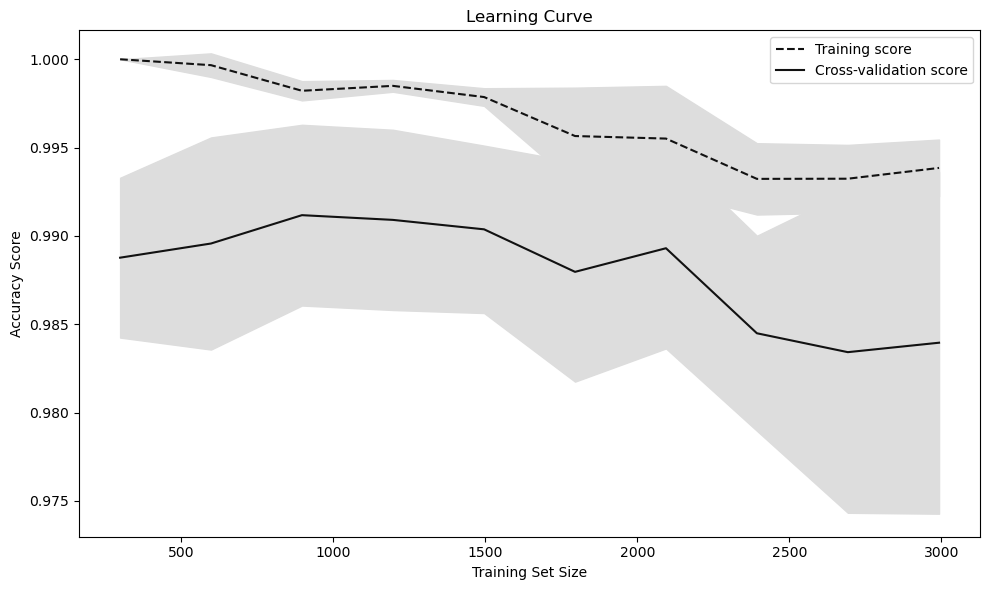

Accuracy for 2022 season: 0.9681818181818181


Top 10 Predicted Finishers for 2022 Season:
driver_name
max verstappen     0.497468
sergio perez       0.281559
charles leclerc    0.234259
carlos sainz       0.062032
george russell     0.043653
lewis hamilton     0.016938
lando norris       0.000862
esteban ocon       0.000169
fernando alonso    0.000122
valtteri bottas    0.000045
Name: predicted_probability, dtype: float64


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('./data/final_df.csv')

features = [
    'season', 'round', 'driver_points', 'driver_standings_pos', 'driver_wins', 
    'constructor_points', 'constructor_standings_pos', 'constructor_wins',
    'fp_pos_1', 'fp_time_1', 'fp_pos_2', 'fp_time_2', 'fp_pos_3', 'fp_time_3',
    'weather_cloudy', 'weather_cold', 'weather_dry', 'weather_warm', 'weather_wet'
]

for feature in features:
    if 'time' in feature or 'laps' in feature:
        data[feature].fillna(data[feature].median(), inplace=True)
    else:
        data[feature].fillna(data[feature].mode()[0], inplace=True)

data['season_end_top_10'] = data.groupby('season')['driver_points'].transform(lambda x: x >= x.nlargest(10).min())

X = data[features]
y = data['season_end_top_10']

X_train = X[data['season'] < 2022]
y_train = y[data['season'] < 2022]
X_test = X[data['season'] == 2022]
y_test = y[data['season'] == 2022]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

train_sizes, train_scores, test_scores = learning_curve(logreg, X_scaled, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,6))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

logreg.fit(X_train_scaled, y_train)
probabilities = logreg.predict_proba(X_test_scaled)[:, 1]

data_2022 = data[data['season'] == 2022].copy()
data_2022['predicted_probability'] = probabilities

driver_probabilities = data_2022.groupby('driver_name')['predicted_probability'].mean().sort_values(ascending=False)
top_10_finishers = driver_probabilities.head(10)

y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for 2022 season:", accuracy)
print("\n")
print("Top 10 Predicted Finishers for 2022 Season:")
print(top_10_finishers)